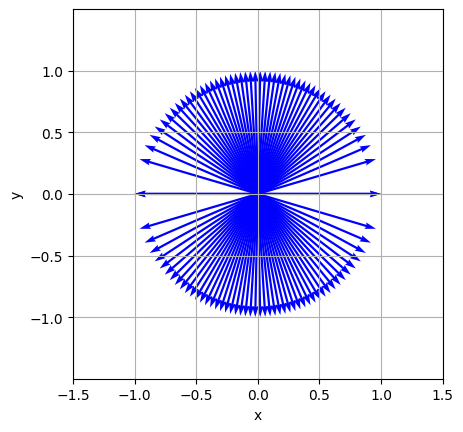

In [1]:
from utils import plot_vectors, generate_vector_space
from matplotlib import pyplot as plt
import numpy as np

# Create Unit Circle with vectors
fig, ax = plt.subplots()
vector_space = generate_vector_space(50)
plot_vectors(vector_space,ax=ax)
plt.show()



Each row in `vector_space` is a vector. Now we want to find space of `Ax` where `A` is a matrix. Ax_space will have shape (number_of_points,2) each row is a vector in the space of `Ax_i`. Rather than multiplying one by one we can use `np.matmul` to multiply all rows at once.

In [ ]:
A = np.array([[1, 2], [3, 4]])
# A has shape (2,2) , vector_space has shape (100,2)
Ax_space = np.matmul(A,vector_space.T).T

The crucial point is to understand why we transpose vector space. Let me explain from the scratch. In multiplying matrix A with B to get Z. I mean Z = AB. Z's first column is equal to matrix-vector product of A with B's first column. We want to do matrix-vector product of A with all vectors in the `vector_space`. So we converted each row(each vector) in `vector_space` to column and then we did matrix-vector product of A with each column. Finally we need to do transpose to get vectors in rows of `Ax_space`

In [22]:
assert np.array_equal(Ax_space[2,:], np.matmul(A,vector_space[2,:]))

Let's find eigenvectors and eigenvalues of A matrix

In [23]:
from numpy import linalg as LA
eig_values, eig_vectors = LA.eig(A)
print(eig_values)
print(eig_vectors)

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


Each column of `eig_vectors` is an eigenvector of A and each element of `eig_values` is an eigenvalue of A. Now let's add eigenvalues to vector_space and plot with different colors

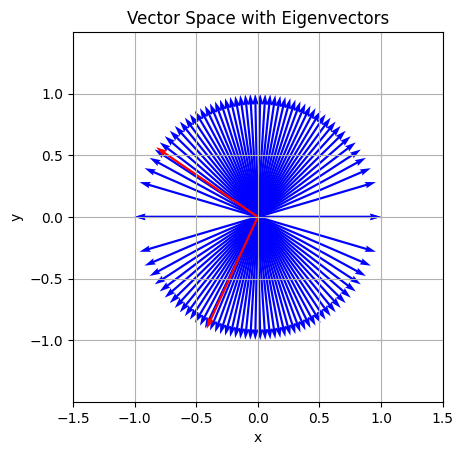

In [26]:
vector_space_with_eigenvectors = np.vstack((vector_space, eig_vectors.T))
fig,ax = plt.subplots()
colors = ["blue" for _ in range(vector_space.shape[0])]+["red" for _ in range(eig_vectors.shape[1])]
plot_vectors(vector_space_with_eigenvectors,ax=ax,colors=colors,title="Vector Space with Eigenvectors")
plt.show()